**K-Nearest Neighbor**:It is a Supervised Machine Learning Algorithm which can be both used as Regression,Classification.



A classification algorithm which classifies based on K number samples near a new data point

*It is also called as a lazy learning algorithm ,the reason behind calling it lazy is instead of learning from the data it memorize the data.

*Whenever a new data point is added it stores the data later it starts classifying the data in to category.



It is used for text categorization ,recommender system..etc...

**How does knn work**:

step_1:Choose the value of k

Step_2: Find the distances from new data point to points in training data.

Step_3:Find the k  nearest neighbor from the data point.

Step_4:Assign the class label with majority among the K neighbors


**Metric_calculations_**:

*In order to classify the distance between new data point to the training data points we use metrics.

*metrics helps us to measure the distance between the two samples.

*knn algorithm has 3 types of metrics like

**Euclidean distance**

**Manhattan distance**

**Minkowski distance**

By default Minkowski distance is choosen by knn ,whereas Eculidean is the best choise.

**Minkowski distance:**To calculate the distance between the two data points we use the formula as

**d(x,u)== (|x₁ - u₁|^p + |x₂ - u₂|^p + ... + |x_d - u_d|^p)^(1/p)**

*p is a parameter


*the  value of p will be p>=1



**Manhattan_distance**:

if the value of p=1then it can be count as manhattan distance.

**dm(x,u)== (|x₁ - u₁|^p + |x₂ - u₂|^p + ... + |x_d - u_d|^p)^(1/p)**

**Euclidean distance**:

if the value of p=2 then it is euclidean distance.

**de(x,u)== (|x₁ - u₁|^p + |x₂ - u₂|^p + ... + |x_d - u_d|^p)^(1/p)**



In [91]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [92]:
df=pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [93]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [95]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Data_Description')

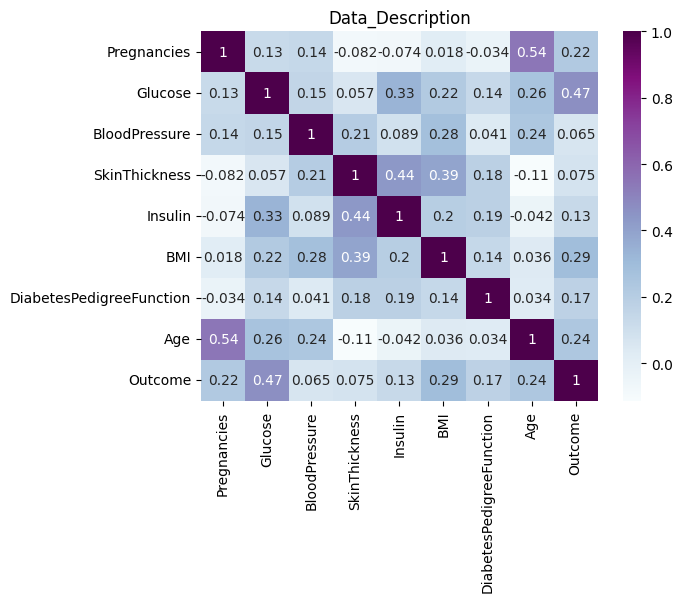

In [96]:
corr=df.corr()
cor=sns.heatmap(corr,annot=True,cmap="BuPu")
cor.set_title("Data_Description")

In [97]:
print(*df.columns,sep=" | ")

Pregnancies | Glucose | BloodPressure | SkinThickness | Insulin | BMI | DiabetesPedigreeFunction | Age | Outcome


In [98]:
Y=df["Outcome"]
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [99]:
X=df.drop(["Outcome"],axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [100]:
print(X.shape,Y.shape)

(768, 8) (768,)


In [101]:
Target_ratio=Y.value_counts()/len(Y)
Target_ratio

Outcome
0    0.651042
1    0.348958
Name: count, dtype: float64

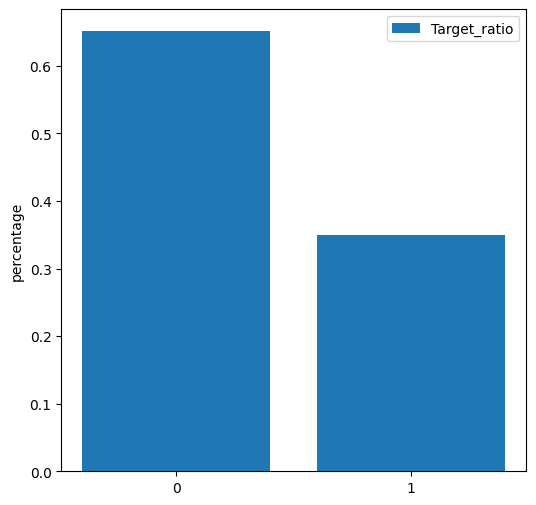

In [102]:
plt.figure(figsize=(6,6))
plt.bar(Target_ratio.index,Target_ratio)
plt.ylabel("percentage")
plt.xticks(Target_ratio.index)
plt.legend(["Target_ratio"])
plt.show()

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

In [104]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X=sc.fit_transform(X)
X

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [105]:
from sklearn.neighbors import KNeighborsClassifier
#by deafult the value of parameter n is 5

knn6=KNeighborsClassifier(n_neighbors=9,metric="euclidean")
knn6.fit(x_train,y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [106]:
pred=knn6.predict(x_test)
pred

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [107]:
print(accuracy_score(pred,y_test))

0.7748917748917749


In [108]:
knn3=KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [109]:
pred_1=knn3.predict(x_test)

In [110]:
print(accuracy_score(pred_1,y_test))

0.7359307359307359
